# EXERCICE 1 - PARTIE 2 : PYTHON
### 1) SANS PANDAS / SK

In [29]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
X = np.array([3,3,4,6])
Y = np.array([21, 32, 43, 54])
avg_x = np.mean(X)
avg_y = np.mean(Y)

ecart_type_x = np.std(X)
ecart_type_y = np.std(Y)

print(f"La moyenne de X est {avg_x}, La moyenne de Y est {avg_y}")
print(f"L'écart type de X est {ecart_type_x} et celui de Y est {ecart_type_y}")

La moyenne de X est 4.0, La moyenne de Y est 37.5
L'écart type de X est 1.224744871391589 et celui de Y est 12.298373876248844


In [5]:
X_std = (X - avg_x)/ecart_type_x
Y_std = (Y - avg_y)/ecart_type_y
X_std, Y_std

(array([-0.81649658, -0.81649658,  0.        ,  1.63299316]),
 array([-1.34164079, -0.4472136 ,  0.4472136 ,  1.34164079]))

In [6]:
#Cov matrix
cov_matrix = np.cov(X_std, Y_std)
cov_matrix

array([[1.33333333, 1.21716124],
       [1.21716124, 1.33333333]])

In [9]:
#Eigenvectors of each matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([2.55049457, 0.11617209]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [23]:
#Taux de variance expliqué
explained_variance = []
for i in eigenvalues:
    explained_variance.append((i/sum(eigenvalues))*100)
explained_variance

[95.64354645876384, 4.356453541236168]

In [14]:
#Standardize egeinvector U_n = U/||U||
U = eigenvectors
U_n = U/np.linalg.norm(U)
U_n

array([[ 0.5,  0.5],
       [-0.5,  0.5]])

### 2) AVEC SK

In [25]:
pca = PCA(n_components=2)
scaler = StandardScaler()
Z = scaler.fit_transform(np.vstack((X, Y)).T)

pca.fit(Z)
x_pca = pca.fit_transform(Z) #Projeter les données sur les composantes principales
pca.components_ #Composantes principales
pca.explained_variance_ #Taux de variance
pca.explained_variance_ratio_ #Taux de variance expliqué

print(f"Les composantes principales sont {pca.components_}")
print(f"Les taux de variance sont {pca.explained_variance_}")
print(f"Les taux de variance expliqué sont {pca.explained_variance_ratio_}")

Les composantes principales sont [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Les taux de variance sont [2.55049457 0.11617209]
Les taux de variance expliqué sont [0.95643546 0.04356454]


# EXERCICE 2

In [26]:
rng = np.random.RandomState(1)
data = (rng.rand(2,2)@rng.randn(2,200)).T

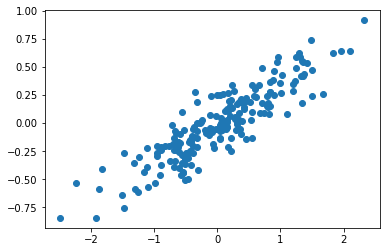

In [31]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [33]:
pca = PCA(n_components=2)
scaler = StandardScaler()
data_fit = scaler.fit(data)

pca.fit_transform(data_fit.transform(data))
print(f"Les composantes principales sont {pca.components_}")
print(f"Les taux de variance sont {pca.explained_variance_}")
print(f"Les taux de variance expliqué sont {pca.explained_variance_ratio_}")

Les composantes principales sont [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Les taux de variance sont [1.89888438 0.11116588]
Les taux de variance expliqué sont [0.94469498 0.05530502]


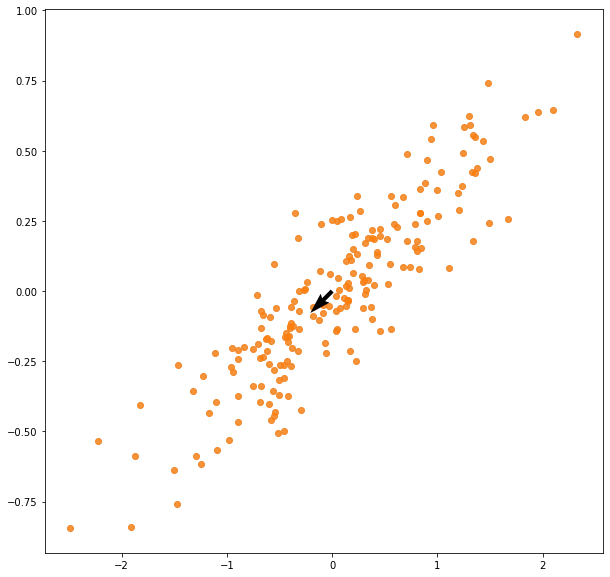

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0], data[:, 1], alpha=0.2)
plt.scatter(pca.inverse_transform(pca.transform(data))[:, 0], pca.inverse_transform(pca.transform(data))[:, 1], alpha=0.8)
plt.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0, 0], pca.components_[0, 1])

plt.show()

Les variances expliquées par les axes sont [1.89888438 0.11116588]
Les variances expliquées cumulées sont [1.89888438 2.01005025]


<BarContainer object of 2 artists>

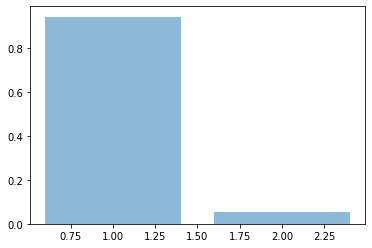

In [37]:

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Les variances expliquées par les axes sont {explained_variance}")
print(f"Les variances expliquées cumulées sont {np.cumsum(explained_variance)}")

plt.bar(range(1, len(explained_variance)+1), explained_variance_ratio, alpha=0.5, align='center', label='Explained variance')

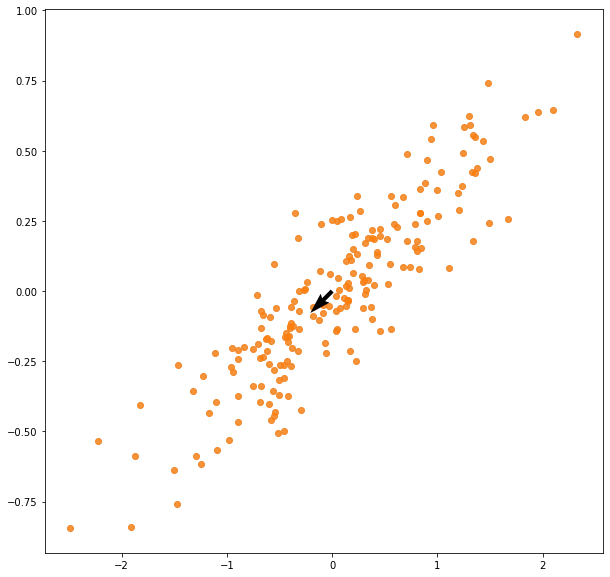

In [40]:
#. Visualiser sur un même graphique le nuage standardisé et le nouveau nuage projeté avec l’axe de composante principale
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0], data[:, 1], alpha=0.2)
plt.scatter(pca.inverse_transform(pca.transform(data))[:, 0], pca.inverse_transform(pca.transform(data))[:, 1], alpha=0.8)
plt.quiver(pca.mean_[0], pca.mean_[1], pca.components_[0, 0], pca.components_[0, 1])
plt.show()

# EXERCICE 3